<a href="https://colab.research.google.com/github/Rozco01/CD_202202_JEFFERSON_ROZO/blob/main/Funcion_K_de_Ripley.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Instalación de librerias


In [1]:
!pip install pyproj
!pip install geopandas
!sudo apt install libspatialindex-dev
!pip install rtree

!pip install cython
!pip install cartopy

!apt-get -qq install python-cartopy python3-cartopy
!pip uninstall -y shapely 
!pip install shapely --no-binary shapely

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 6.3 MB 5.1 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.0 MB 4.9 MB/s 
     |████████████████████████████████| 16.7 MB 538 kB/s 
Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
The following additional packages will be installed:
  libspatialindex-c4v5 libspatialindex4v5
The following NEW packages will be installed:
  libspatialindex-c4v5 libspatialindex-dev libspatialindex4v5
0 upgraded, 3 newly installed, 0 to remove and 29 not upgraded.
Need to get 555 kB of archives.
After this operation, 3,308 kB of additional disk space will be used.
Get:1 http://archive.ubun

In [2]:
import geopandas
import pandas as pd
import numpy as np
import geopandas as gpd
import urllib
from decimal import DivisionByZero
from math import sqrt

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import cm

import cartopy
import cartopy.crs as ccrs                   # for projections
import cartopy.feature as cfeature           # for features
import cartopy.io.shapereader as shapereader
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
from cartopy.feature.nightshade import Nightshade
import pyproj
from shapely.geometry import Polygon, mapping
from shapely.geometry import Point, Polygon
from shapely import wkt


### Obteción de datos

In [4]:
ruta = 'https://foscalinternacional.com/datasets/eventos_dengue_2020.csv'
df = pd.read_csv(ruta)
df

,ID,fec_not,semana,año,edad_,uni_med_,sexo_,cod_pais_o,cod_dpto_o,cod_mun_o,...,hipotension,hepatomegalia,hemorragia_mucosa,hipotermia,caida_plaquetas,acum_liquido,aum_hematocrito,conducta,latitud,longitud
0,1,17/01/2020,1,2020,25,1,F,170,68,276,...,2,2,2,2,2,2,2,1. Ambulatorio,7.076011,-73.102501
1,2,10/01/2020,1,2020,24,1,M,170,68,276,...,2,2,2,2,2,2,2,1. Ambulatorio,7.079495,-73.105400
2,3,12/01/2020,1,2020,58,1,M,170,68,276,...,2,2,2,2,2,2,2,1. Ambulatorio,7.090290,-73.091003
3,4,12/01/2020,1,2020,29,1,F,170,68,276,...,2,2,2,2,2,2,2,1. Ambulatorio,7.067435,-73.090958
4,5,10/01/2020,1,2020,56,1,F,170,68,276,...,2,2,2,2,1,2,2,2. Hospitalizacion piso,7.066905,-73.104980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1257,1258,7/03/2020,9,2020,36,1,F,170,68,276,...,2,2,1,2,2,2,2,1. Ambulatorio,7.072610,-73.099487
1258,1259,13/03/2020,9,2020,42,1,M,170,68,276,...,2,2,2,2,1,2,1,2. Hospitalizacion piso,7.065252,-73.103607
1259,1260,8/03/2020,9,2020,2,1,M,170,68,276,...,2,2,2,2,2,2,2,1. Ambulatorio,7.091391,-73.103264
1260,1261,11/03/2020,9,2020,12,1,F,170,68,276,...,2,2,2,2,2,2,2,1. Ambulatorio,7.061083,-73.097000


In [5]:
#Creación de la proyección
P = pyproj.Proj(proj='utm', zone=18, ellps='WGS84', preserve_units=True)

In [6]:
#Se convertirán las coordenadas geográficas a UTM
df['x'], df['y'] = P(df['longitud'], df['latitud'])
df

,ID,fec_not,semana,año,edad_,uni_med_,sexo_,cod_pais_o,cod_dpto_o,cod_mun_o,...,hemorragia_mucosa,hipotermia,caida_plaquetas,acum_liquido,aum_hematocrito,conducta,latitud,longitud,x,y
0,1,17/01/2020,1,2020,25,1,F,170,68,276,...,2,2,2,2,2,1. Ambulatorio,7.076011,-73.102501,709584.027559,782579.281866
1,2,10/01/2020,1,2020,24,1,M,170,68,276,...,2,2,2,2,2,1. Ambulatorio,7.079495,-73.105400,709262.121378,782963.354103
2,3,12/01/2020,1,2020,58,1,M,170,68,276,...,2,2,2,2,2,1. Ambulatorio,7.090290,-73.091003,710847.924654,784163.825097
3,4,12/01/2020,1,2020,29,1,F,170,68,276,...,2,2,2,2,2,1. Ambulatorio,7.067435,-73.090958,710863.366771,781635.895608
4,5,10/01/2020,1,2020,56,1,F,170,68,276,...,2,2,1,2,2,2. Hospitalizacion piso,7.066905,-73.104980,709314.159319,781570.969374
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1257,1258,7/03/2020,9,2020,36,1,F,170,68,276,...,1,2,2,2,2,1. Ambulatorio,7.072610,-73.099487,709918.546763,782204.438977
1258,1259,13/03/2020,9,2020,42,1,M,170,68,276,...,2,2,1,2,1,2. Hospitalizacion piso,7.065252,-73.103607,709466.644754,781388.734012
1259,1260,8/03/2020,9,2020,2,1,M,170,68,276,...,2,2,2,2,2,1. Ambulatorio,7.091391,-73.103264,709492.782783,784279.996264
1260,1261,11/03/2020,9,2020,12,1,F,170,68,276,...,2,2,2,2,2,1. Ambulatorio,7.061083,-73.097000,710198.574916,780930.648555


In [7]:
df['x'].mean()
df['y'].mean()

782763.2617568913

### Impresión de puntos en el mapa

In [8]:
ruta = 'https://foscalinternacional.com/datasets/eventos_dengue_2020.csv'
df = pd.read_csv(ruta)

# Creación de la proyección
P = pyproj.Proj(proj='utm', zone=18, ellps='WGS84', preserve_units=True)

# Se convertirán las coordenadas geográficas a UTM
df['x'], df['y'] = P(df['longitud'], df['latitud'])

# Obtain the remote shapefile files
url = 'https://foscal.net/cartografia/'

file_list= ["68276_urbano.cpg","68276_urbano.dbf","68276_urbano.prj","68276_urbano.qmd","68276_urbano.shp","68276_urbano.shx"]

for file in file_list:
  urllib.request.urlretrieve(url+file, file)


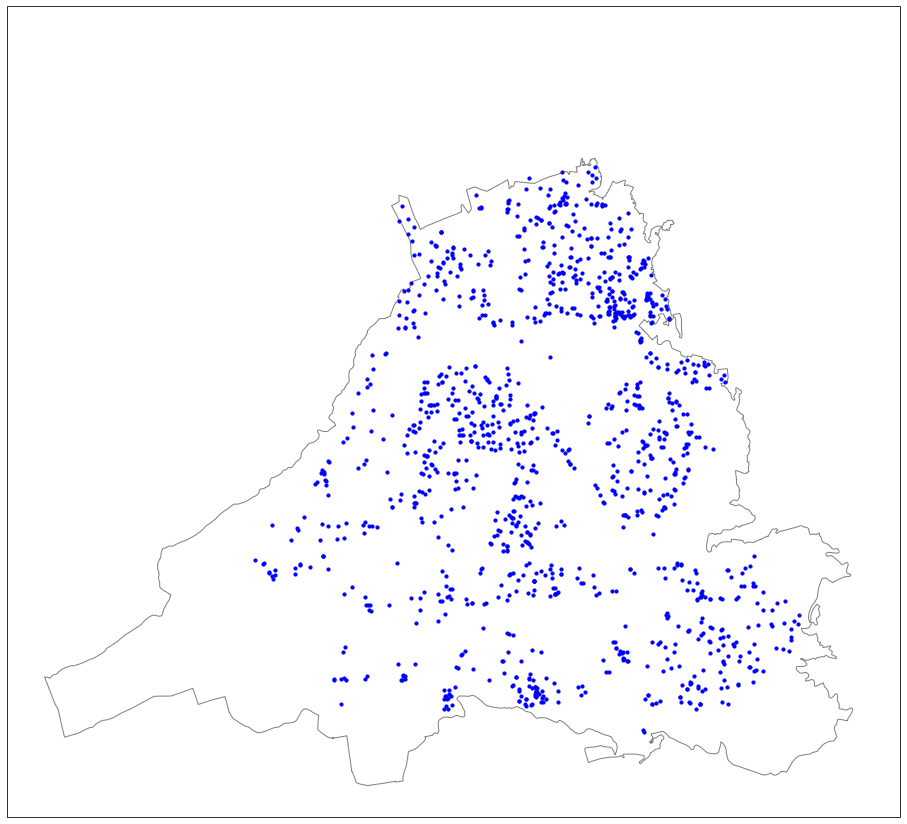

In [9]:
subplot_kw = dict(projection=ccrs.PlateCarree())

fig, ax = plt.subplots(figsize=(16, 16), subplot_kw=subplot_kw)

# Mapa de floridablanca
lower_lon = -73.135
upper_lon = -73.070
lower_lat = 7.051
upper_lat = 7.110

ax.set_extent([lower_lon, upper_lon, lower_lat, upper_lat])

reader = shapereader.Reader('68276_urbano.shp')

for geometria in reader.geometries():
    ax.add_geometries([geometria], ccrs.PlateCarree(), facecolor='white', edgecolor='gray')

ax.scatter(df['longitud'], df['latitud'], zorder=10, c='b', s=10)

ax.add_line
plt.show()

In [10]:
for geometria in reader.geometries():
  geo = geometria

geod = pyproj.Geod(ellps="WGS84")
area = abs(geod.geometry_area_perimeter(geo)[0])

In [11]:
reader = shapereader.Reader('68276_urbano.shp')
points_to_use = df.shape[0]

for geometry in reader.geometries():
  polygon = geometry

def random_points_in_bound(polygon, number):   
    minx, miny, maxx, maxy = polygon.bounds
    x = np.random.uniform( minx, maxx, number )
    y = np.random.uniform( miny, maxy, number )
    return x, y

In [12]:
import geopandas as gpd

gdf_poly = gpd.GeoDataFrame(index=["florida"], geometry=[polygon])

### Metodos

In [21]:
def distancia(x1,y1,x2,y2):
  distancia = math.sqrt( ((x2-x1)**2) + ((y2-y1)**2) )
  return distancia

In [22]:
def areaMapa(shp):
  florida_map = gpd.read_file(shp)
  florida_map_copy = florida_map.copy()
  crs = pyproj.CRS(proj='utm', zone=18, ellps='WGS84')
  florida_map_copy= florida_map_copy.to_crs(crs)
  florida_map_copy["area_m"] = florida_map_copy['geometry'].area
  florida_map_copy["area_km"] = florida_map_copy['geometry'].area / 10**6
  Area_total = florida_map_copy['area_m'].sum()
  return Area_total


In [36]:
import math
def valorK(listaPuntos, h):
  from random import random
  upper_limit = 5
  lower_limit = 0.1
  num = random() * (upper_limit - lower_limit) + lower_limit
  area = areaMapa('68276_urbano.shp')
  contK = 0
  for i in range(len(listaPuntos) - 1):
    for j in range(i+1, len(listaPuntos)):
      if distancia(listaPuntos[i][0], listaPuntos[i][1], listaPuntos[j][0], listaPuntos[j][1]) <= h:
        contK +=1
  valorK = (contK *area / len(listaPuntos)**2)*num
  return valorK

### Calculo de puntos

In [37]:
listaDePuntos = []
for i in range(df.shape[0]):
  listaDePuntos.append((df['x'][i], df['y'][i]))
print(listaDePuntos[i][1])

781097.1692095568


In [38]:
from shapely.geometry import Point
import geopandas as gpd
import random
def random_points_in_polygon(number, polygon):
    points = []
    min_x, min_y, max_x, max_y = polygon.bounds
    i= 0
    while i < number:
        point = Point(random.uniform(min_x, max_x), random.uniform(min_y, max_y))
        if polygon.contains(point):
            points.append(point)
            i += 1
    return points  # returns list of shapely point

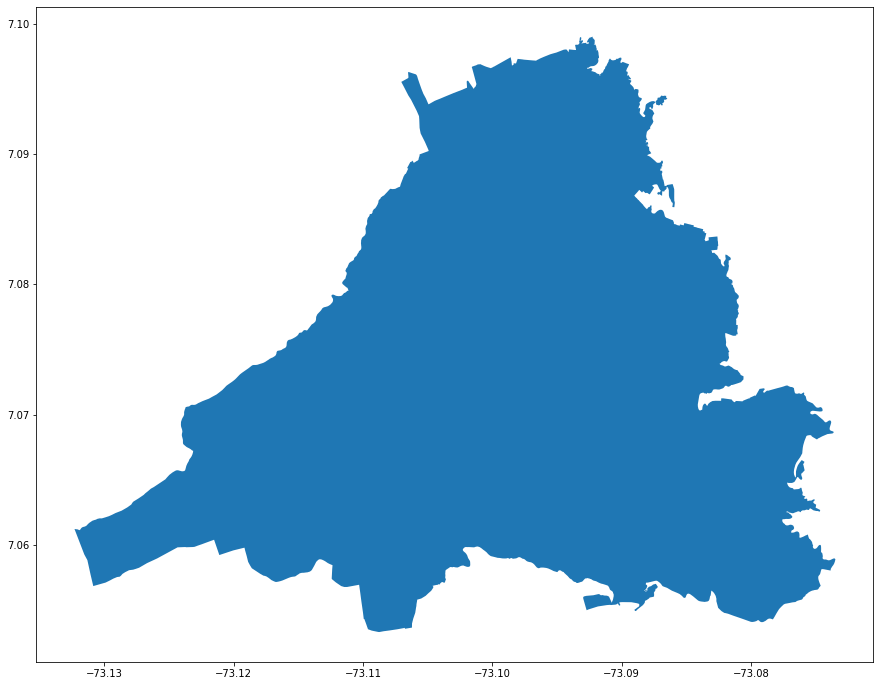

In [39]:
#mapa de floridablanca
florida_map = gpd.read_file('68276_urbano.shp')
fig, ax = plt.subplots(1, 1, figsize=(15, 15))
florida_map.plot(ax=ax)

In [40]:
florida_map_copy = florida_map.copy()
crs = pyproj.CRS(proj='utm', zone=18, ellps='WGS84')
florida_map_copy= florida_map_copy.to_crs(crs)
#florida_map_copy= florida_map_copy.to_crs({'init': 'epsg:6933'})

#Area
florida_map_copy["area_km"] = florida_map_copy['geometry'].area / 10**6
florida_map_copy["area_m"] = florida_map_copy['geometry'].area 

In [41]:
Area_total = florida_map_copy['area_km'].sum()
print(Area_total)

17.03006698945965


In [42]:
points = random_points_in_polygon(1262, florida_map.iloc[0].geometry)
# print coordinates of all points
for i, point in enumerate(points):
    print("Point {}: ({},{})".format(str(i+1), point.x, point.y))

Point 1: (-73.0932991745454,7.067167955316151)
Point 2: (-73.08197150167601,7.0677566334796875)
Point 3: (-73.0954180226202,7.096108077258533)
Point 4: (-73.0752922856189,7.070610327140423)
Point 5: (-73.10946279637146,7.07421739467906)
Point 6: (-73.11779593278504,7.068080160323775)
Point 7: (-73.1052095329891,7.078261124670173)
Point 8: (-73.10959883764191,7.068529775430742)
Point 9: (-73.12520276806515,7.062005857328738)
Point 10: (-73.09262721717299,7.060088732444686)
Point 11: (-73.11775119212672,7.0662320215418575)
Point 12: (-73.08755201574208,7.058214405714787)
Point 13: (-73.12847973038289,7.062002944142539)
Point 14: (-73.08488949610475,7.079205506425664)
Point 15: (-73.08571605171652,7.078643381274478)
Point 16: (-73.0814522363939,7.067855442470333)
Point 17: (-73.09893121063567,7.070243479783556)
Point 18: (-73.09424780709269,7.065659390499576)
Point 19: (-73.12620291586032,7.064007635827822)
Point 20: (-73.09362264516822,7.0678529792913665)
Point 21: (-73.09128121487173,7.

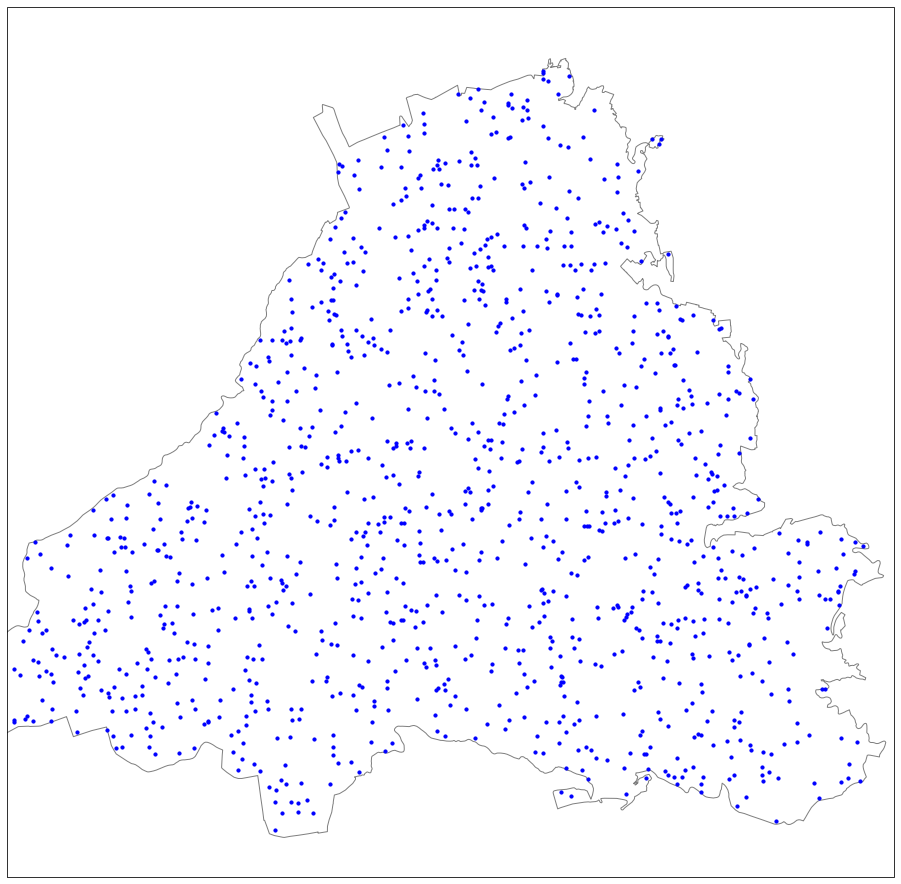

In [43]:
listaDeX = []
listaDeY = []
for point in points:
  listaDeX.append(point.x)
  listaDeY.append(point.y)

subplot_kw = dict(projection=ccrs.PlateCarree())

fig, ax = plt.subplots(figsize=(16, 16), subplot_kw=subplot_kw)

# Mapa de floridablanca
lower_lon = -73.125
upper_lon = -73.073
lower_lat = 7.051
upper_lat = 7.102

ax.set_extent([lower_lon, upper_lon, lower_lat, upper_lat])

reader = shapereader.Reader('68276_urbano.shp')

for manzana in reader.geometries():
    ax.add_geometries([manzana], ccrs.PlateCarree(), facecolor='white', edgecolor='gray')

ax.scatter(listaDeX, listaDeY, zorder=10, c='b', s=10)

ax.add_line
plt.show()

In [44]:
lista_aux = []
for h in range(10, 210, 10):
  lista_K_ripley = []
  for i in range(0, 10, 1):
    k = valorK(listaDePuntos, h)
    #k = valorK(100, points, False) # K de ripley de los puntos randomicos del mapa
    lista_K_ripley.append(k)
  lista_aux.append(lista_K_ripley)
print(lista_K_ripley)
print(lista_aux)

[292757.8554390754, 278368.92545065726, 170968.23071844436, 426216.69055858324, 347355.005076582, 140521.74737957426, 369450.3953414693, 356122.19731535425, 168204.9611369518, 532891.1369353965]
[[3392.4226790238795, 3234.6673416932963, 269.52788879132936, 6139.488358111574, 9967.292138761602, 5325.414110223468, 8861.464051778541, 5089.017548453734, 6104.3081423498115, 2211.8225120105085], [18807.317419205985, 7663.842977853016, 921.205749791587, 612.7614619671741, 4975.640005490074, 15558.350449492893, 10473.87317502477, 19763.840106710424, 1479.3549801337083, 18839.030099842636], [32159.71881820205, 3022.8797190595756, 23802.986869557404, 6597.570457104847, 24608.97253322868, 25254.648418783632, 28191.605725464193, 5934.615290040037, 33321.48061948524, 15578.169154373529], [1664.223027671173, 26691.579618953197, 18995.5790285481, 43483.82279847558, 40358.58179099635, 4823.107873700085, 25410.852107231756, 43427.977407091996, 36200.23796217373, 19364.956106829315], [18329.16675876197,

### Conversion

In [45]:
tabla = []
cont = 0
h = 10
for i in range(0, 20, 1):
  list_final = []
  np_listaK = np.array(lista_aux[cont])
  np_listaK = np.sort(np_listaK)

  k_real = lista_aux[cont][0]
  np_perc1 = np.percentile(np_listaK, 2.5)
  np_perc2 = np.percentile(np_listaK, 97.5)

  list_final.append(h)
  list_final.append(k_real)
  list_final.append(np_perc1)
  list_final.append(np_perc2)
  cont+=1
  h += 10
  tabla.append(list_final)
tabla

[[10, 3392.4226790238795, 706.5441790156447, 9718.480819190414],
 [20, 18807.317419205985, 682.161426727667, 19555.75785516517],
 [30, 32159.71881820205, 3678.020222530179, 33060.084214196526],
 [40, 1664.223027671173, 2374.9721180276783, 43471.25758541427],
 [50, 18329.16675876197, 7447.679904030845, 53693.562946495986],
 [60, 24938.155206176485, 8825.79382307847, 71046.7961901114],
 [70, 51098.50155836894, 25172.65884097094, 120149.57046635948],
 [80, 130826.80103809151, 28011.27003661324, 140910.660844783],
 [90, 92559.5500306394, 15186.895416411677, 143549.55684914129],
 [100, 170174.4055921046, 8090.724644460799, 183709.68207540776],
 [110, 157031.528305924, 60213.698484877656, 224575.26323972683],
 [120, 44079.16302542698, 25418.734241452818, 265108.3921503101],
 [130, 186201.2909315074, 26004.28265719458, 289416.9389019394],
 [140, 115463.30194547694, 35304.65003954433, 309448.23083706084],
 [150, 209056.89209396456, 26434.317744747073, 308820.79964512406],
 [160, 156207.0860499

In [46]:
#Conversion de la lista 2D a un dataframe
df_K_Ripley = pd.DataFrame(tabla, columns =['H', 'k_real', 'percentil_2.5', 'percentil_97.5'])
df_K_Ripley['H'] = df_K_Ripley.H.astype('category') 
print(df_K_Ripley)

      H         k_real  percentil_2.5  percentil_97.5
0    10    3392.422679     706.544179     9718.480819
1    20   18807.317419     682.161427    19555.757855
2    30   32159.718818    3678.020223    33060.084214
3    40    1664.223028    2374.972118    43471.257585
4    50   18329.166759    7447.679904    53693.562946
5    60   24938.155206    8825.793823    71046.796190
6    70   51098.501558   25172.658841   120149.570466
7    80  130826.801038   28011.270037   140910.660845
8    90   92559.550031   15186.895416   143549.556849
9   100  170174.405592    8090.724644   183709.682075
10  110  157031.528306   60213.698485   224575.263240
11  120   44079.163025   25418.734241   265108.392150
12  130  186201.290932   26004.282657   289416.938902
13  140  115463.301945   35304.650040   309448.230837
14  150  209056.892094   26434.317745   308820.799645
15  160  156207.086050   32928.332562   444356.872114
16  170  199381.766671   24332.529706   487973.322337
17  180  549290.088487   454

In [47]:
df_K_Ripley.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   H               20 non-null     category
 1   k_real          20 non-null     float64 
 2   percentil_2.5   20 non-null     float64 
 3   percentil_97.5  20 non-null     float64 
dtypes: category(1), float64(3)
memory usage: 1.3 KB


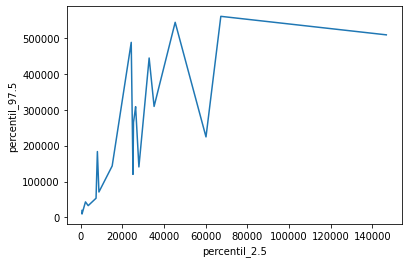

In [52]:
import seaborn as sb
sb.lineplot(x='percentil_2.5',y='percentil_97.5',data= df_K_Ripley)

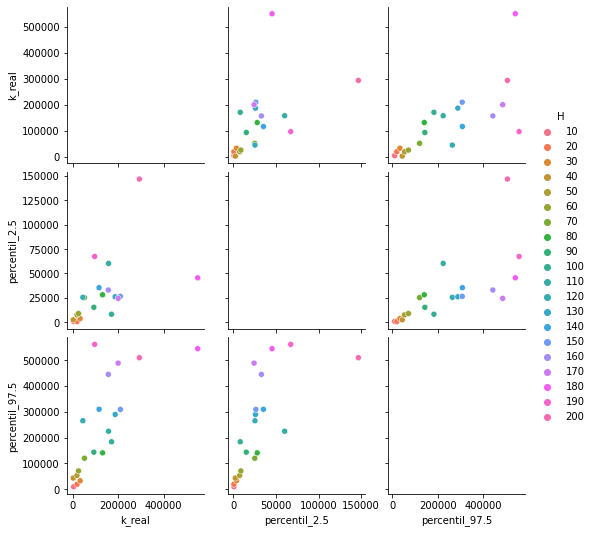

In [53]:
sb.pairplot(data=df_K_Ripley, hue='H')